In [1]:
from keras.models import Model
import keras.layers as KL
import keras.backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
def custom_loss1(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))
def custom_loss2(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [3]:
input_tensor1 = KL.Input((32, 32, 3))
input_tensor2 = KL.Input((4,))
input_target = KL.Input((2,))

x = KL.BatchNormalization(axis=1)(input_tensor1)
x = KL.Conv2D(16, (3,3), padding="same")(x)
x = KL.Activation("relu")(x)
x = KL.MaxPool2D(2)(x)
x = KL.Conv2D(32, (3,3), padding="same")(x)
x = KL.Activation("relu")(x)
x = KL.MaxPool2D(2)(x)
x = KL.Flatten()(x)
x = KL.Dense(32)(x)
out2 = KL.Dense(2)(x)

y = KL.Dense(32)(input_tensor2)
out1 = KL.Dense(2)(y)
loss1 = KL.Lambda(lambda x:custom_loss1(*x), name='loss1')([out2, out1])
loss2 = KL.Lambda(lambda x:custom_loss2(*x), name='loss2')([input_target, out2])

model = Model([input_tensor1, input_tensor2, input_target], [out1, out2, loss1, loss2])

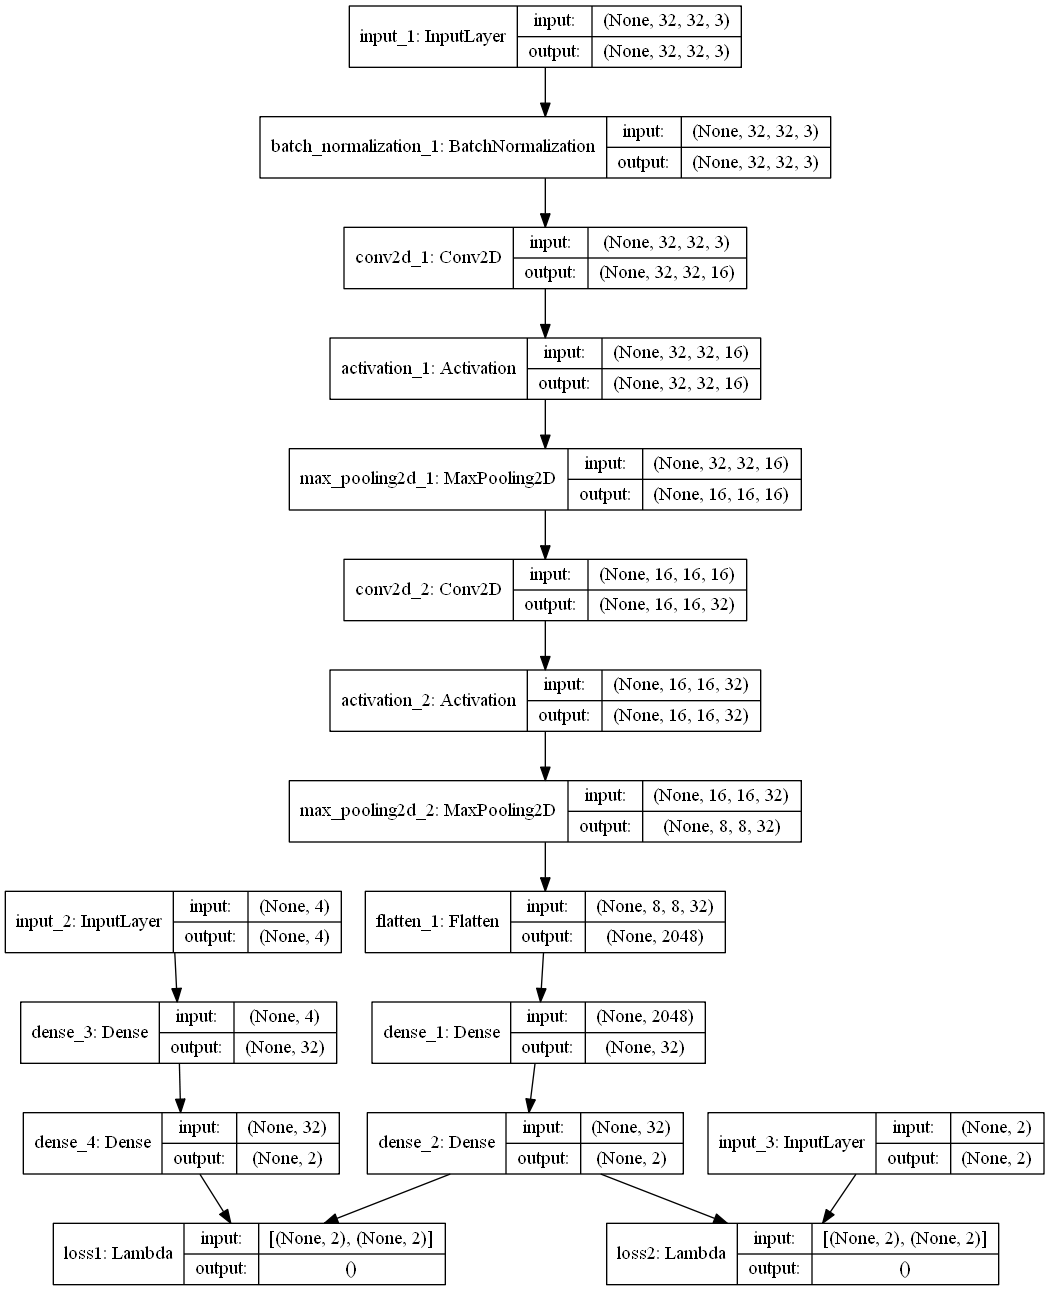

In [4]:
from keras.utils.vis_utils import plot_model
# model.summary()
plot_model(model, to_file="model.png", show_shapes=True)

In [5]:
loss_lay1 = model.get_layer("loss1").output
loss_lay2 = model.get_layer("loss2").output

model.add_loss(loss_lay1)
model.add_loss(loss_lay2)

model.compile(optimizer="sgd", loss=[None, None, None, None])

In [13]:
def data_gen(num):
    for i in range(num):
        yield [
                np.random.normal(1, 1, (1, 32, 32, 3)),
                np.random.normal(1, 1, (1,4)), 
                np.random.normal(1, 1, (1,2)), 
               ], []

In [14]:
# 生假数据
dataSet = data_gen(10000)

In [15]:
model.fit_generator(dataSet, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: nan
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: nan
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/20
100/100 [==============================] - 0s 2m